In [213]:
import pandas as pd
import numpy as np

In [214]:
stress_file = 'stresstensor+van mises.txt'

In [215]:
def read_file(txt_file: str = "",columns='') -> pd.DataFrame:
        df_txt = pd.read_table(txt_file, skiprows=8, header=None, index_col=False)[0]
        txt_header = " ".join(df_txt[0].split())
        txt_header = txt_header[1:]
        txt_header = txt_header.lstrip()
        while txt_header.find('(') != -1:
            leading_idx = txt_header.find('(')
            trailing_idx = txt_header.find(')', leading_idx, len(txt_header))
            if len(txt_header) > trailing_idx:
                txt_header = txt_header[0: leading_idx:] + txt_header[trailing_idx + 1::]
        txt_header = txt_header.rstrip()
        txt_header = list(txt_header.split())

        def data_split(x):
            return [float(y) for y in " ".join(x.split()).split()]

        df_rdata = df_txt[1:].apply(data_split)

        df_rdata = pd.DataFrame(df_rdata)
        df_data = pd.DataFrame(df_rdata[0].tolist(),columns=columns)

        return df_data


In [216]:
df_stress_file = read_file(stress_file,columns=['x','y','z','sx','sxy','sxz','sy','syz','sz','solid.mises'])

In [217]:
df_stress_file.columns = ['x','y','z','solid.sx','solid.sxy','solid.sxz','solid.sy','solid.syz','solid.sz','solid.mises']

In [218]:
df_stress_file.head()

x      y         z       solid.sx      solid.sxy     solid.sxz  \
0 -3.900000 -125.0 -4.500000 -106052.710015  162519.864550 -30997.307610   
1 -3.816245 -125.0 -4.672517  -10771.318316   60781.738351 -12161.667871   
2 -4.000000 -125.0 -4.600000   38754.169620   21960.661105  10974.341188   
3 -3.900000 -120.0 -4.500000 -110448.919144   86196.843925 -36914.449502   
4 -3.816245 -120.0 -4.672517     866.952321   39961.056346   4679.321549   

        solid.sy      solid.syz      solid.sz    solid.mises  
0  279024.093169   32137.046954 -54394.575601  471218.935921  
1  112678.059576  127261.681157   7060.189254  273958.586270  
2  232489.230845  197436.899163  49568.526744  400356.657157  
3   93664.880891    4144.106155 -80882.990527  282327.287095  
4  -15999.948553   19570.907341   2193.690408  109738.228217

In [219]:
def vonMises(stresses):
    J2 = 0.5*(((stresses['solid.sx'] - stresses['solid.sy']) ** 2 + \
                  (stresses['solid.sy'] - stresses['solid.sz']) ** 2 + \
                  (stresses['solid.sz'] - stresses['solid.sx']) ** 2) + \
                  (6*(stresses['solid.sxy']**2 + stresses['solid.sxz']**2 + stresses['solid.syz']**2)))
    return np.sqrt(J2)

def vonMises2(stresses):
    J2 = 1 / 6 * (((stresses['solid.sx'] - stresses['solid.sy']) ** 2 + (stresses['solid.sy'] - stresses['solid.sz']) ** 2 
                   +(stresses['solid.sz'] - stresses['solid.sx']) ** 2)) + \
                   (stresses['solid.sxy'] ** 2 + stresses['solid.syz'] ** 2 + stresses['solid.sxz'] ** 2)
    return np.sqrt(3 * J2)

In [220]:
stress_variables = ['solid.sx','solid.sy','solid.sz','solid.sxy','solid.sxz','solid.syz']
stress_invar = {name:np.array(df_stress_file[name]).reshape(-1,1) for name in stress_variables }

In [221]:
df_stress_file['vonMises'] = vonMises(stress_invar)
df_stress_file['error percent'] = abs(df_stress_file['vonMises']-df_stress_file['solid.mises'])/df_stress_file['solid.mises']*100

In [222]:
df_stress_file.head(20)

x      y         z       solid.sx      solid.sxy     solid.sxz  \
0  -3.900000 -125.0 -4.500000 -106052.710015  162519.864550 -30997.307610   
1  -3.816245 -125.0 -4.672517  -10771.318316   60781.738351 -12161.667871   
2  -4.000000 -125.0 -4.600000   38754.169620   21960.661105  10974.341188   
3  -3.900000 -120.0 -4.500000 -110448.919144   86196.843925 -36914.449502   
4  -3.816245 -120.0 -4.672517     866.952321   39961.056346   4679.321549   
5  -4.000000 -120.0 -4.600000   64599.222879   13813.334806  24406.082799   
6  -3.900000 -125.0 -5.000000  115738.530384 -166533.144153 -32617.287436   
7  -4.000000 -125.0 -4.900000   -2972.367867  -41041.204356   2028.983502   
8  -3.760104 -125.0 -4.853391   24279.147511 -107565.426218  -7316.346850   
9  -3.900000 -120.0 -5.000000  122070.082107  -81285.843708 -42249.924182   
10 -4.000000 -120.0 -4.900000  -29140.727232  -22226.199847  13935.806951   
11 -3.760104 -120.0 -4.853391   -2832.857099  -46827.133244   6543.620902   
12 -3.900000 -115.0 -4.500000  -51238.501854    2420.743237 -17081.136366   
13 -3.816245 -115.0 -4.672517   -2615.395910    5952.555710     45.813420   
14 -4.000000 -115.0 -4.600000   35674.252117    3129.862988  15296.776475   
15 -3.900000 -115.0 -5.000000   57133.917468    1193.387097 -19660.985208   
16 -4.000000 -115.0 -4.900000  -21984.133981   -2621.079058   8942.626910   
17 -3.760104 -115.0 -4.853391    3998.324653    2895.787582    911.284264   
18  4.000000 -125.0 -4.900000  -31117.203861   32916.632158  -8074.683444   
19  3.900000 -125.0 -5.000000  103702.139221  162425.332029  30749.991088   

         solid.sy      solid.syz       solid.sz    solid.mises       vonMises  \
0   279024.093169   32137.046954  -54394.575601  471218.935921  465058.432524   
1   112678.059576  127261.681157    7060.189254  273958.586270  271053.513475   
2   232489.230845  197436.899163   49568.526744  400356.657157  392819.566701   
3    93664.880891    4144.106155  -80882.990527  282327.287095  250860.542452   
4   -15999.948553   19570.907341    2193.690408  109738.228217   79460.921241   
5    96942.176741   77724.057508   81409.864887  180915.402893  145833.607804   
6  -220819.959257   26022.126001   78054.082942  444297.268824  436384.799875   
7  -158799.850442  206758.778925  -19515.666640  399043.588881  394069.859457   
8   -97566.228038  101209.189109   -7079.723075  280660.870159  278586.055591   
9  -260498.829986    -632.949425  112819.926584  428313.356562  409980.793769   
10 -255017.438295   78127.855104  -51733.479976  274970.287362  258464.817040   
11 -191484.541664    8361.487387   -2937.564755  215908.971542  206121.947735   
12 -201568.709231  -13000.693429  -45358.284986  165854.288273  157853.261489   
13 -212084.006619  -12699.056618   -4871.393391  211138.888434  209761.128217   
14 -170305.662883   -5251.048838   46913.354768  216570.622253  213736.180842   
15 -243577.357354  -15086.510860   61972.740232  309607.678482  306190.328944   
16 -273886.751021   -7356.735548  -34730.199653  249355.772644  246636.392145   
17 -244797.930004  -13202.504972    4808.462179  251389.342308  250304.531168   
18 -172685.684646  195634.150642  -39257.396558  378645.318974  370431.884459   
19 -228906.029789   48354.927704   59150.240471  438646.816358  432194.387649   

    error percent  
0        1.307355  
1        1.060406  
2        1.882594  
3       11.145485  
4       27.590483  
5       19.391270  
6        1.780895  
7        1.246413  
8        0.739260  
9        4.280175  
10       6.002638  
11       4.532940  
12       4.824130  
13       0.652537  
14       1.308784  
15       1.103768  
16       1.090562  
17       0.431526  
18       2.169163  
19       1.470985

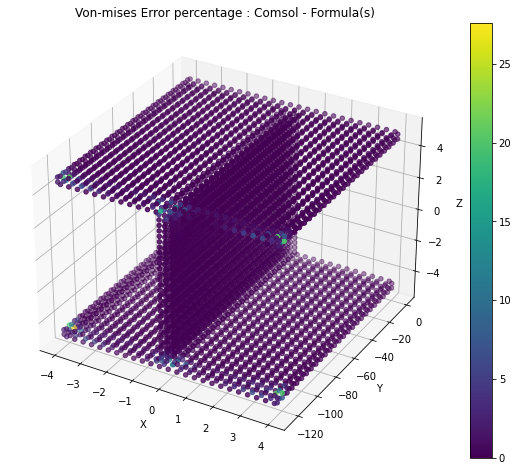

In [223]:
import matplotlib
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection='3d')
sc = ax.scatter(df_stress_file['x'],df_stress_file['y'],df_stress_file['z'],'.',c=df_stress_file['error percent'])
plt.colorbar(sc,orientation='vertical')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Von-mises Error percentage : Comsol - Formula(s)')
plt.show()

<AxesSubplot:>

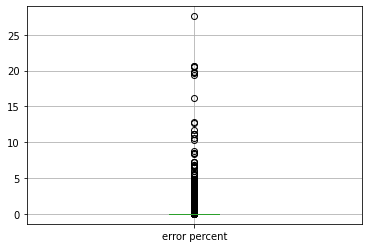

In [224]:
df_stress_file.boxplot(column=['error percent'])

In [225]:
from matplotlib import pyplot as plt

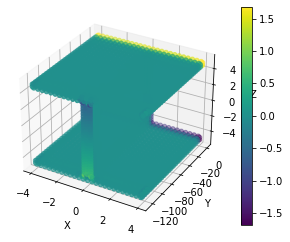

In [226]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(df_stress_file['x'], df_stress_file['y'], df_stress_file['z'], '.',c=df_stress_file['solid.sz']*1e-6)
plt.colorbar(sc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [227]:
df_stress_file.describe()

x            y            z      solid.sx      solid.sxy  \
count  6266.000000  6266.000000  6266.000000  6.266000e+03    6266.000000   
mean     -0.017226   -62.500000    -0.038267 -2.925946e+02     529.964782   
std       1.980871    37.502993     4.140925  2.790176e+05   88786.056220   
min      -4.000000  -125.000000    -5.000000 -2.679827e+06 -643352.072917   
25%      -0.989311   -95.000000    -4.500000 -3.049702e+01  -18073.084723   
50%      -0.000064   -62.500000    -0.163324  7.359089e-02       0.180689   
75%       0.977431   -30.000000     4.500000  2.544896e+01   20360.883930   
max       4.000000     0.000000     5.000000  2.751004e+06  643589.898177   

           solid.sxz      solid.sy      solid.syz      solid.sz   solid.mises  \
count    6266.000000  6.266000e+03    6266.000000  6.266000e+03  6.266000e+03   
mean       21.658882 -1.149916e+04   80838.366902 -4.916357e+02  1.211691e+06   
std     32847.650901  1.468371e+06  102671.611058  2.423157e+05  7.406456e+05   
min   -800918.021474 -3.911268e+06 -118887.019645 -1.676258e+06  1.365335e+04   
25%        -9.574389 -1.057507e+06     586.425026 -2.696240e+01  5.262875e+05   
50%         0.000000 -3.010321e+03    1417.168571  1.383528e-01  1.067709e+06   
75%         6.684017  1.013844e+06  208120.122201  3.313403e+01  1.814453e+06   
max    729161.731362  3.911414e+06  405471.415063  1.676320e+06  2.911607e+06   

           vonMises  error percent  
count  6.266000e+03   6.266000e+03  
mean   1.211162e+06   1.517499e-01  
std    7.409899e+05   1.060896e+00  
min    1.365335e+04   0.000000e+00  
25%    5.252058e+05   2.369820e-07  
50%    1.067709e+06   5.004241e-06  
75%    1.814390e+06   2.022048e-03  
max    2.911398e+06   2.759048e+01

In [228]:
df_stress_round = df_stress_file
df_stress_round['solid.sx'] = round(df_stress_round['solid.sx'])
df_stress_round['solid.sy'] = round(df_stress_round['solid.sy'])
df_stress_round['solid.sz'] = round(df_stress_round['solid.sz'])
df_stress_round['solid.sxy'] = round(df_stress_round['solid.sxy'])
df_stress_round['solid.sxz'] = round(df_stress_round['solid.sxz'])
df_stress_round['solid.syz'] = round(df_stress_round['solid.syz'])

In [229]:
df_stress_round


x      y         z   solid.sx  solid.sxy  solid.sxz   solid.sy  \
0    -3.900000 -125.0 -4.500000  -106053.0   162520.0   -30997.0   279024.0   
1    -3.816245 -125.0 -4.672517   -10771.0    60782.0   -12162.0   112678.0   
2    -4.000000 -125.0 -4.600000    38754.0    21961.0    10974.0   232489.0   
3    -3.900000 -120.0 -4.500000  -110449.0    86197.0   -36914.0    93665.0   
4    -3.816245 -120.0 -4.672517      867.0    39961.0     4679.0   -16000.0   
...        ...    ...       ...        ...        ...        ...        ...   
6261  3.260689    0.0  4.500000  1308727.0   451371.0        0.0  3053697.0   
6262  3.585160   -5.0  4.500000   195734.0    -7524.0    -1107.0  2624558.0   
6263  3.435306    0.0  4.749712  1440861.0   505496.0        0.0  3362009.0   
6264  3.583899    0.0  5.000000  1575695.0   559035.0        0.0  3676623.0   
6265  3.585160    0.0  4.500000  1381991.0   512634.0        0.0  3224646.0   

      solid.syz   solid.sz   solid.mises      vonMises  error percent  
0       32137.0   -54395.0  4.712189e+05  4.650584e+05   1.307355e+00  
1      127262.0     7060.0  2.739586e+05  2.710535e+05   1.060406e+00  
2      197437.0    49569.0  4.003567e+05  3.928196e+05   1.882594e+00  
3        4144.0   -80883.0  2.823273e+05  2.508605e+05   1.114548e+01  
4       19571.0     2194.0  1.097382e+05  7.946092e+04   2.759048e+01  
...         ...        ...           ...           ...            ...  
6261   -60796.0  1308727.0  1.914997e+06  1.914997e+06   1.215828e-14  
6262    -5212.0   261427.0  2.398527e+06  2.396706e+06   7.591115e-02  
6263   -17631.0  1440861.0  2.111474e+06  2.111474e+06   0.000000e+00  
6264    31223.0  1575695.0  2.313953e+06  2.313953e+06   0.000000e+00  
6265   -87539.0  1381991.0  2.051036e+06  2.051036e+06   1.135186e-14  

[6266 rows x 12 columns]

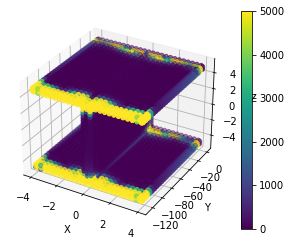

In [230]:
check_stress = 'solid.sz'
#df_zero_stress = df_stress_round[df_stress_round[check_stress]==0]
df_zero_stress = df_stress_file
df_zero_stress['vertical_shear'] = df_zero_stress['solid.sxz'] + df_zero_stress['solid.syz']+ df_zero_stress['solid.sz']
#df_zero_stress = df_zero_stress[df_zero_stress['vertical_shear']==df_zero_stress['vertical_shear'].min()]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(df_zero_stress['x'], df_zero_stress['y'], df_zero_stress['z'], '.',c=abs(df_zero_stress['solid.sxz']),vmin=0,vmax=5000)
plt.colorbar(sc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [231]:
abs(df_zero_stress).describe()

x            y            z      solid.sx      solid.sxy  \
count  6266.000000  6266.000000  6266.000000  6.266000e+03    6266.000000   
mean      1.444358    62.500000     3.890442  6.454528e+04   40946.102298   
std       1.355597    37.502993     1.418016  2.714482e+05   78780.674041   
min       0.000000     0.000000     0.004051  0.000000e+00       0.000000   
25%       0.250000    30.000000     3.270531  2.000000e+00      37.250000   
50%       0.989311    62.500000     4.500000  2.800000e+01   19929.000000   
75%       2.611724    95.000000     4.752850  1.568250e+03   52784.000000   
max       4.000000   125.000000     5.000000  2.751004e+06  643590.000000   

           solid.sxz      solid.sy      solid.syz      solid.sz   solid.mises  \
count    6266.000000  6.266000e+03    6266.000000  6.266000e+03  6.266000e+03   
mean     4350.207309  1.179512e+06   82489.024577  5.575831e+04  1.211691e+06   
std     32558.275663  8.745153e+05  101349.975746  2.358128e+05  7.406456e+05   
min         0.000000  1.300000e+01       1.000000  0.000000e+00  1.365335e+04   
25%         1.000000  4.067602e+05     643.000000  3.000000e+00  5.262875e+05   
50%         8.000000  1.025277e+06    5453.000000  3.050000e+01  1.067709e+06   
75%       215.000000  1.839438e+06  208120.000000  1.972000e+03  1.814453e+06   
max    800918.000000  3.911414e+06  405471.000000  1.676320e+06  2.911607e+06   

           vonMises  error percent  vertical_shear  
count  6.266000e+03   6.266000e+03    6.266000e+03  
mean   1.211162e+06   1.517499e-01    1.310654e+05  
std    7.409899e+05   1.060896e+00    2.440093e+05  
min    1.365335e+04   0.000000e+00    2.000000e+00  
25%    5.252058e+05   2.369820e-07    7.010000e+02  
50%    1.067709e+06   5.004241e-06    1.793450e+04  
75%    1.814390e+06   2.022048e-03    2.176620e+05  
max    2.911398e+06   2.759048e+01    1.934839e+06

In [232]:
l = .125 * 1e3
w = .008 * 1e3
h = .010 * 1e3
t_h = 5e-4 * 1e3
t_b = 5e-4 * 1e3
sa = (h - 2*t_h)*t_b + (2*w*t_h)
print(f'Surface area = {sa}')

Surface area = 12.5


In [233]:
df_stress_file['y'].unique()

array([-125., -120., -120., -115., -115., -110., -110., -105., -105.,
       -100., -100.,  -95.,  -95.,  -90.,  -90.,  -85.,  -80.,  -80.,
        -75.,  -75.,  -70.,  -70.,  -65.,  -65.,  -60.,  -60.,  -55.,
        -55.,  -50.,  -50.,  -45.,  -45.,  -40.,  -40.,  -35.,  -30.,
        -30.,  -25.,  -25.,  -20.,  -20.,  -15.,  -15.,  -10.,   -5.,
         -5.,    0., -120., -115., -125., -120., -125., -110., -115.,
       -115., -115., -125., -125., -120., -120., -105., -110., -110.,
       -115., -120., -120., -100., -105., -105., -110., -110.,  -95.,
       -100., -105., -105., -110., -115., -120.,  -90.,  -95.,  -95.,
       -100., -105., -115.,  -85.,  -90.,  -95.,  -95.,  -95., -100.,
       -105., -110., -115.,  -80.,  -85.,  -90.,  -90.,  -90.,  -95.,
       -105., -110.,  -75.,  -80.,  -80.,  -85.,  -90., -100.,  -70.,
        -75.,  -80.,  -65.,  -75.,  -75.,  -80.,  -85., -105., -115.,
        -60.,  -65.,  -70.,  -70.,  -75., -115.,  -55.,  -60.,  -65.,
        -75.,  -80.,

In [234]:
# neumann condition -> sigma.n  = F
# first check n = [0,-1,0] -> implies  sigma_xy = 0, sigma_yy = 0, sigma_yz = F/sa
df_surface = df_stress_file[df_stress_file['y']==-125]
F = 1
traction_rhs = F/sa
sa


12.5

In [235]:
traction_rhs

0.08

In [236]:
for columns in df_surface.columns:
    if 'solid' in columns:
        df_surface[columns] = df_surface[columns]*1e-6

C:\Users\naraya01\AppData\Local\Temp\ipykernel_1284\3491512499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surface[columns] = df_surface[columns]*1e-6


In [237]:
#pd.set_option('display.max_rows', 100)
#df_surface

<AxesSubplot:>

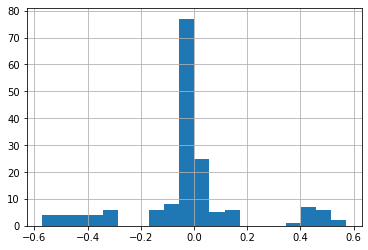

In [238]:
neumann_xy = df_surface['solid.sxy']
neumann_xy.hist(bins=20)
#print(neumann)

<AxesSubplot:>

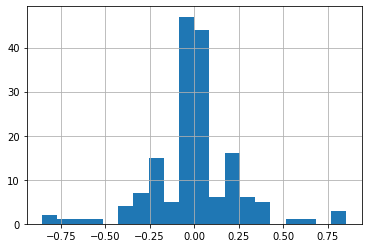

In [239]:
neumann_y = df_surface['solid.sy']
neumann_y.hist(bins=20)
#print(neumann_y)

<AxesSubplot:>

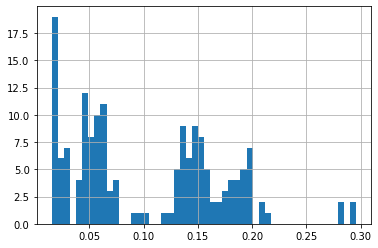

In [240]:
neumann_yz = df_surface['solid.syz']
neumann_yz.hist(bins=50)
#print(neumann_yz)

In [241]:
neumann_yz = df_surface['solid.sz']
neumann_yz.sum()

0.31719300000000006

<AxesSubplot:>

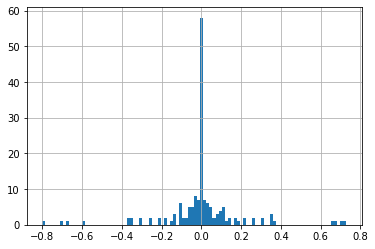

In [242]:
neumann = df_surface['solid.sxz']
neumann.hist(bins=100)
#print(neumann)

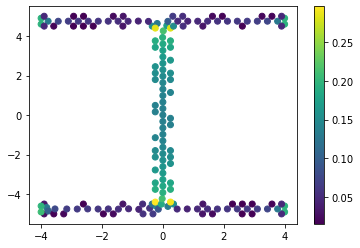

In [243]:
sc = plt.scatter(df_surface['x'],df_surface['z'],c=df_surface['solid.syz'])
plt.colorbar(sc)
plt.show()

In [244]:
df_surface['solid.syz'].median()

0.074018

In [245]:
traction_rhs

0.08

In [246]:
df_surface['solid.syz']

0       0.032137
1       0.127262
2       0.197437
6       0.026022
7       0.206759
          ...   
4965    0.063689
5070    0.066321
5072    0.021034
5175    0.074018
5177    0.019462
Name: solid.syz, Length: 165, dtype: float64

In [247]:
df_surface['solid.sxy'].median()

-2.7e-05

In [248]:
df_surface['solid.sy'].median()

-7.099999999999999e-05

In [249]:
df_surface['solid.sz'].median()

-7.9e-05

In [250]:
flange_sa = t_h * w
web_sa  = (h-2*t_h) * t_b

In [251]:
traction_flange = F/flange_sa
traction_web = F/web_sa

In [252]:
traction_web

0.2222222222222222

In [253]:
traction_flange

0.25

In [254]:
mid_section_height = h - (2*t_h)
moment_of_inertia = (w* h**3/12) - 2*( ( (w-t_b)/2 * (mid_section_height)**3)/12)

In [255]:
df_traction = df_surface
traction_alternative = F * abs(df_traction['z'])/moment_of_inertia

In [256]:
df_traction['traction_2'] = traction_alternative

C:\Users\naraya01\AppData\Local\Temp\ipykernel_1284\1592451363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traction['traction_2'] = traction_alternative


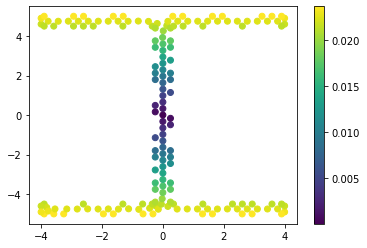

In [257]:
sc = plt.scatter(df_traction['x'],df_traction['z'],c=df_traction['traction_2'])
plt.colorbar(sc)
plt.show()

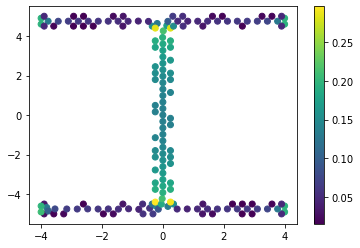

In [258]:
sc = plt.scatter(df_surface['x'],df_surface['z'],c=df_surface['solid.syz'])
plt.colorbar(sc)
plt.show()

In [259]:
flange_ind = np.where(abs(df_surface['z']) >= (h-t_h)/2)[0]
df_flange = df_surface[abs(df_surface['z'])>= (h-t_h)/2]

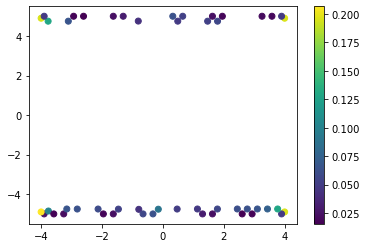

In [260]:
sc = plt.scatter(df_flange['x'],df_flange['z'],c=df_flange['solid.syz'])
plt.colorbar(sc)
plt.show()

<AxesSubplot:>

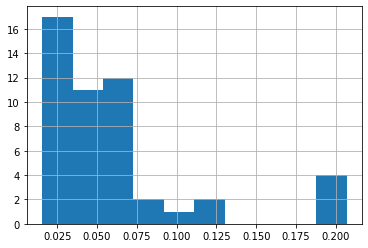

In [261]:
df_flange['solid.syz'].hist()

In [262]:
df_web = df_surface[abs(df_surface['z']) < (h/2-t_h)]

In [263]:
h/2 -t_h

4.5

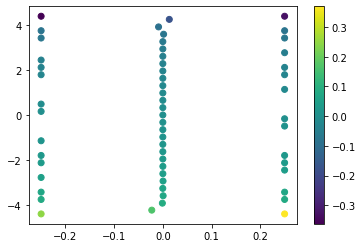

In [264]:
sc = plt.scatter(df_web['x'],df_web['z'],c=df_web['solid.sy'])
plt.colorbar(sc)
plt.show()

<AxesSubplot:>

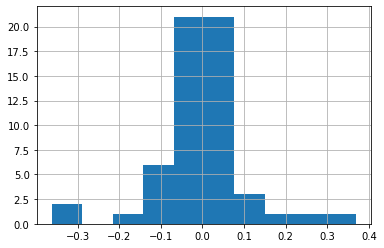

In [265]:
df_web['solid.sy'].hist()

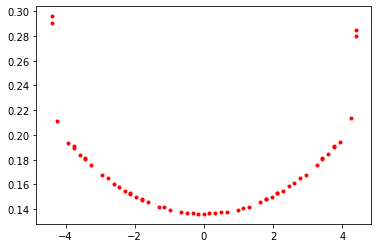

In [266]:
plt.plot(df_web['z'],df_web['solid.syz'],'r.')

In [300]:
hw = h - (2*t_h)
b = w
max_d = abs(df_web['z']).max()
Ic = 1/12 * ((b*h**3) - (b*hw**3) + (t_b*hw**3))
traction_web = (F * ((b*(h**2 - hw**2)) + (t_b*(hw**2-(4*(df_web['z']**2))))))/(8*Ic*t_b)

<AxesSubplot:>

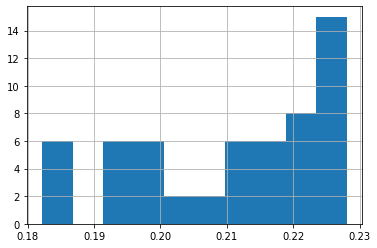

In [268]:
traction_web.hist()

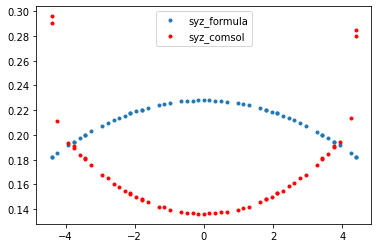

In [301]:
plt.plot(df_web['z'],traction_web,'.')
plt.plot(df_web['z'],df_web['solid.syz'],'r.')
plt.legend(['syz_formula','syz_comsol'])

In [270]:
df_surface

x      y         z  solid.sx  solid.sxy  solid.sxz  solid.sy  \
0    -3.900000 -125.0 -4.500000 -0.106053   0.162520  -0.030997  0.279024   
1    -3.816245 -125.0 -4.672517 -0.010771   0.060782  -0.012162  0.112678   
2    -4.000000 -125.0 -4.600000  0.038754   0.021961   0.010974  0.232489   
6    -3.900000 -125.0 -5.000000  0.115739  -0.166533  -0.032617 -0.220820   
7    -4.000000 -125.0 -4.900000 -0.002972  -0.041041   0.002029 -0.158800   
...        ...    ...       ...       ...        ...        ...       ...   
4965  2.772860 -125.0  4.748913  0.002767   0.005077  -0.102408 -0.009719   
5070  3.103634 -125.0  4.749759 -0.000777  -0.000025  -0.063965 -0.011917   
5072  3.258102 -125.0  5.000000 -0.184769  -0.359119  -0.020879  0.223217   
5175  3.435306 -125.0  4.749712 -0.002115  -0.001840  -0.024874 -0.015999   
5177  3.583899 -125.0  5.000000 -0.124462  -0.314538  -0.004270  0.243324   

      solid.syz  solid.sz  solid.mises       vonMises  error percent  \
0      0.032137 -0.054395     0.471219  465058.432524       1.307355   
1      0.127262  0.007060     0.273959  271053.513475       1.060406   
2      0.197437  0.049569     0.400357  392819.566701       1.882594   
6      0.026022  0.078054     0.444297  436384.799875       1.780895   
7      0.206759 -0.019516     0.399044  394069.859457       1.246413   
...         ...       ...          ...            ...            ...   
4965   0.063689 -0.000476     0.219972  209366.934944       4.821040   
5070   0.066321 -0.000869     0.171161  159978.804552       6.532923   
5072   0.021034 -0.005599     0.719418  717627.628391       0.248918   
5175   0.074018 -0.001305     0.144105  136040.868270       5.596221   
5177   0.019462 -0.006239     0.636683  635418.435286       0.198611   

      vertical_shear  traction_2  
0           -53255.0    0.021323  
1           122160.0    0.022140  
2           257980.0    0.021797  
6            71459.0    0.023692  
7           189272.0    0.023218  
...              ...         ...  
4965        -39195.0    0.022502  
5070          1487.0    0.022506  
5072         -5444.0    0.023692  
5175         47839.0    0.022506  
5177          8953.0    0.023692  

[165 rows x 14 columns]

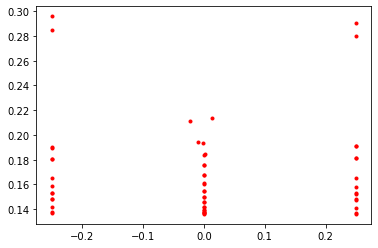

In [271]:
plt.plot(df_web['x'],df_web['solid.syz'],'r.')